In [37]:
from sklearn.preprocessing import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

In [38]:
PATH = 'CC_GENERAL.csv'

In [39]:
dataset = pd.read_csv(PATH)
dataset.drop(['CUST_ID'], axis = 1, inplace = True)

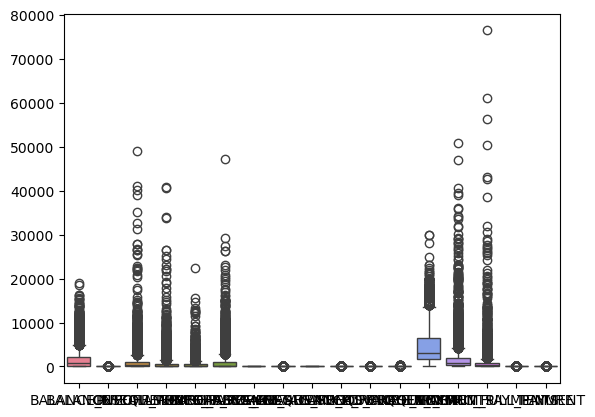

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [40]:
sns.boxplot(data=dataset)
plt.show()
dataset

<Axes: >

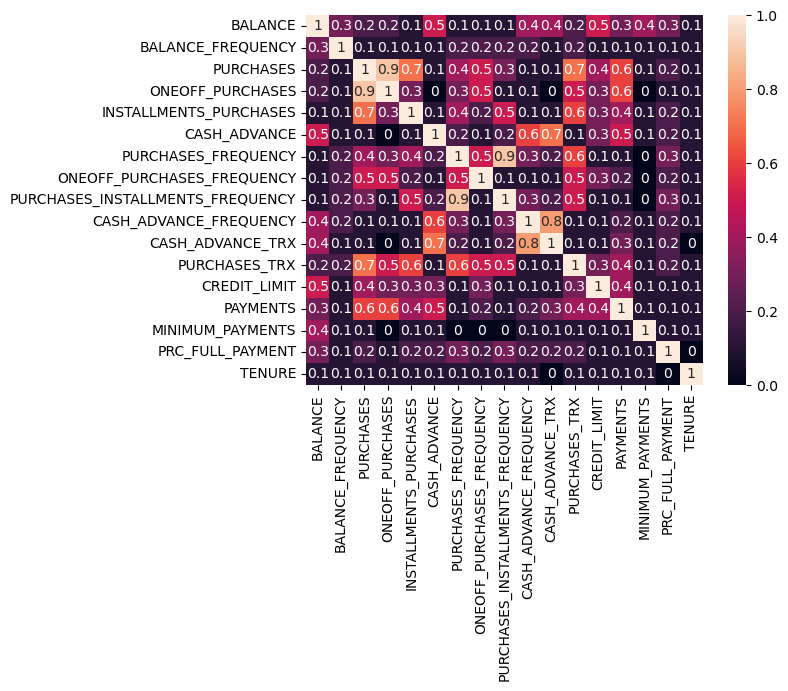

In [41]:
sns.heatmap( 
round( 
abs(dataset.corr()), 
1, 
), 
annot=True, 
)

In [42]:
dataset.drop(['PURCHASES_INSTALLMENTS_FREQUENCY'], axis = 1, inplace = True)

In [43]:
dataset.drop(['ONEOFF_PURCHASES'], axis = 1, inplace = True)

In [44]:
dataset.drop(['PURCHASES_TRX' ], axis = 1, inplace = True)

<Axes: >

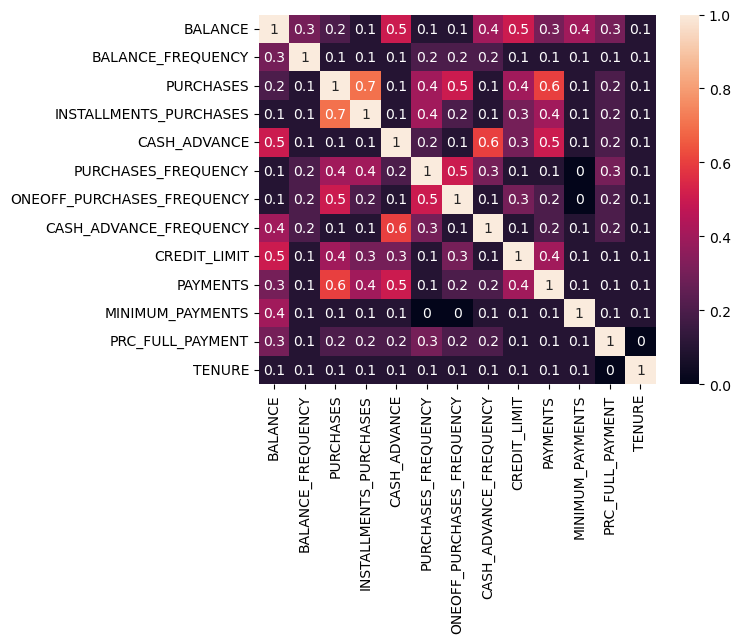

In [45]:
dataset.drop(['CASH_ADVANCE_TRX' ], axis = 1, inplace = True)
sns.heatmap( 
round( 
abs(dataset.corr()), 
1, 
), 
annot=True, 
)

array([[<Axes: title={'center': 'CASH_ADVANCE'}>]], dtype=object)

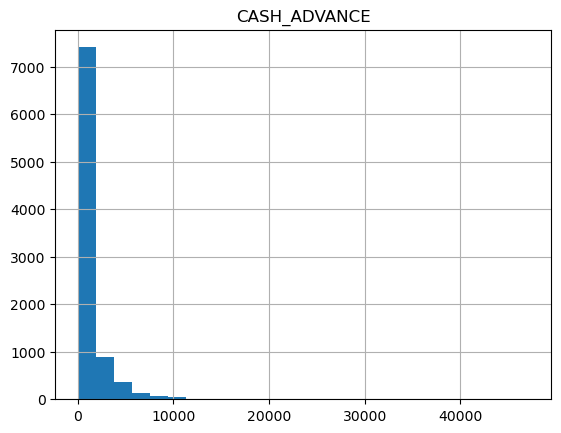

In [46]:
dataset.hist('CASH_ADVANCE', bins =25)

In [47]:
 dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(0)

In [50]:
dataset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.00,205.788017,0.083333,0.083333,0.083333,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,300.00,0.000000,1.000000,0.000000,0.000000,1000.0,275.861322,0.000000,0.000000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,500.0,52.549959,55.755628,0.250000,6


In [52]:
columns = ['BALANCE', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',  'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
filtr_dataset = dataset.copy()

for column in columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtr_dataset = filtr_dataset[(filtr_dataset[column] >= lower_bound) & (filtr_dataset[column] <= upper_bound)]

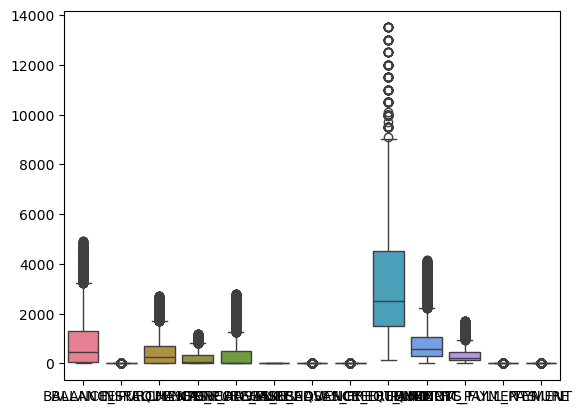

In [36]:
sns.boxplot(data=filtr_dataset)
plt.show()

In [54]:
scaler = MinMaxScaler()
normalized_filtr_data = scaler.fit_transform(filtr_dataset)
norm_filtr_dataset = pd.DataFrame(normalized_filtr_data, columns=filtr_dataset.columns)

array([[<Axes: title={'center': 'CASH_ADVANCE'}>]], dtype=object)

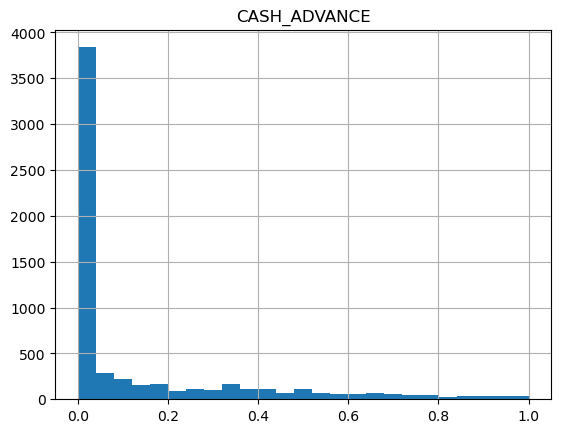

In [57]:
norm_filtr_dataset.hist('CASH_ADVANCE', bins =25)

Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

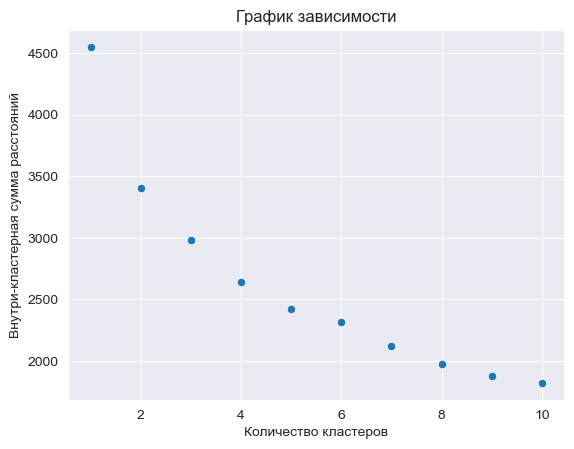

In [62]:
inertia = [] 
for i in range(1, 11): 
    k_means = KMeans(n_clusters=i, init= 'k-means++') 
    k_means.fit(norm_filtr_dataset)
    inertia.append(k_means.inertia_) 
 
sns.set_style('darkgrid') 
sns.scatterplot( 
    x=[x for x in range(1, 11)], 
    y=inertia, 
) 
 
plt.title('График зависимости') 
plt.xlabel('Количество кластеров') 
plt.ylabel('Внутри-кластерная сумма расстояний')

In [65]:
# Наилучшее k наверно 3
 
CLUSTERS = 3 
 
model = KMeans(n_clusters=CLUSTERS) 
 
model.fit(norm_filtr_dataset) 

clusters = pd.DataFrame(columns=norm_filtr_dataset.columns, 
    data=model.cluster_centers_ ) 
 
clusters["Amount"] = np.unique( 
    model.labels_, 
    return_counts=True 
)[1] 
 
clusters 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Amount
0,0.288350,0.969332,0.066364,0.028755,0.258297,0.132056,0.070690,0.121735,0.215501,0.192789,0.283037,0.016301,0.922731,2445
1,0.141423,0.955506,0.323060,0.348674,0.062174,0.858887,0.301129,0.033362,0.264724,0.227494,0.195926,0.248278,0.916633,2456
2,0.013177,0.404417,0.105388,0.096763,0.052329,0.287026,0.070212,0.020758,0.227341,0.139730,0.055871,0.229985,0.872715,1240


Text(0, 0.5, 'Внутри-кластерная сумма расстояний')

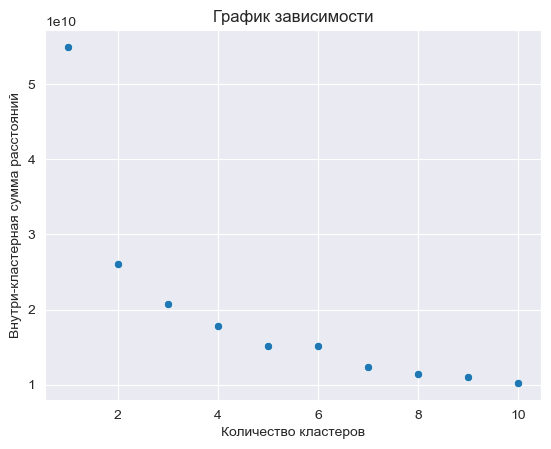

In [66]:
inertia = [] 
for i in range(1, 11): 
    k_means = KMeans(n_clusters=i, init= 'k-means++') 
    k_means.fit(filtr_dataset)
    inertia.append(k_means.inertia_) 
 
sns.set_style('darkgrid') 
sns.scatterplot( 
    x=[x for x in range(1, 11)], 
    y=inertia, 
) 
 
plt.title('График зависимости') 
plt.xlabel('Количество кластеров') 
plt.ylabel('Внутри-кластерная сумма расстояний')

In [67]:
CLUSTERS = 3 
 
model = KMeans(n_clusters=CLUSTERS) 
 
model.fit(filtr_dataset) 

clusters = pd.DataFrame(columns=filtr_dataset.columns, 
    data=model.cluster_centers_ ) 
 
clusters["Amount"] = np.unique( 
    model.labels_, 
    return_counts=True 
)[1] 
 
clusters 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Amount
0,707.328468,0.844720,371.485967,177.409485,389.626186,0.422179,0.114869,0.107390,1802.047320,698.710584,329.235055,0.134700,11.280653,3977
1,1219.070329,0.881865,769.122094,247.665076,294.348300,0.547978,0.324805,0.066624,8764.184844,1129.053917,388.191404,0.209448,11.809986,721
2,1101.431476,0.847515,633.608382,236.142958,417.917840,0.494531,0.213804,0.092127,4796.229307,967.022637,385.539814,0.171845,11.785417,1443
